# Expense Tracker

In [3]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

In [16]:
# Connect to the database and load the data into a DataFrame
conn = sql.connect('/Users/tuank/PycharmProjects/HelloWorld/Expense Tracking Tool/expenses.db')
df = pd.read_sql_query("SELECT * FROM expenses", conn)
conn.close()

# Drop the first row since it was my testing value and reset the index
df = df.drop(0).reset_index(drop=True)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Understanding the data (I used ChatGPT to random them randomly)
# 1. Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# 2. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# 3. Describe the DataFrame to get summary statistics
print("\nSummary statistics of the DataFrame:")
print(df.describe())

First few rows of the DataFrame:
   id  amount       date  category_id         description
0   2    12.5 2023-01-01            6  Lunch at cafeteria
1   3    45.2 2023-01-02            7            Gasoline
2   4    30.0 2023-01-03            8       Movie tickets
3   5    75.0 2023-01-04            9    Electricity bill
4   6    15.0 2023-01-05            6           Groceries

Missing values in each column:
id             0
amount         0
date           0
category_id    0
description    0
dtype: int64

Summary statistics of the DataFrame:
               id     amount                           date  category_id
count  190.000000  190.00000                            190   190.000000
mean    97.015789   46.81000  2023-03-31 20:35:22.105263104     7.721053
min      2.000000    8.00000            2023-01-01 00:00:00     6.000000
25%     49.250000   25.00000            2023-02-17 06:00:00     6.000000
50%     97.500000   40.00000            2023-03-30 12:00:00     8.000000
75%    144.75

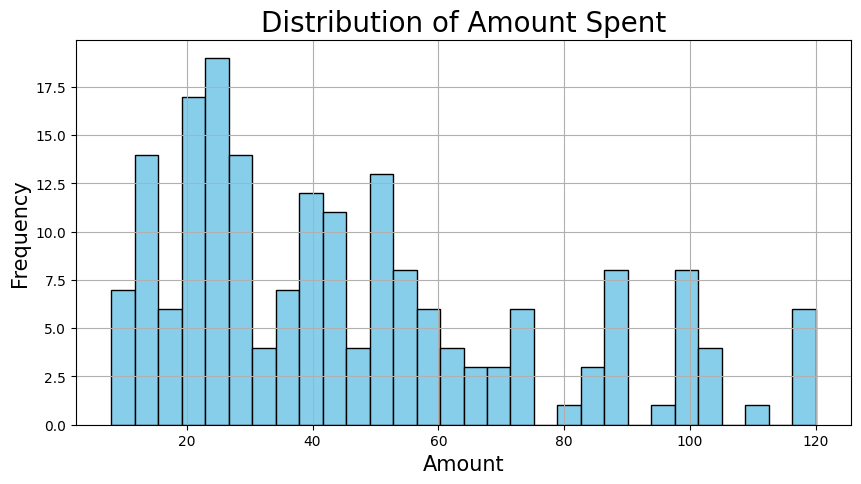

In [13]:
#Visualize the distribution of the 'amount' column
plt.figure(figsize=[10, 5], dpi=100)
plt.hist(df['amount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Amount Spent', fontsize=20)
plt.xlabel('Amount', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.show()

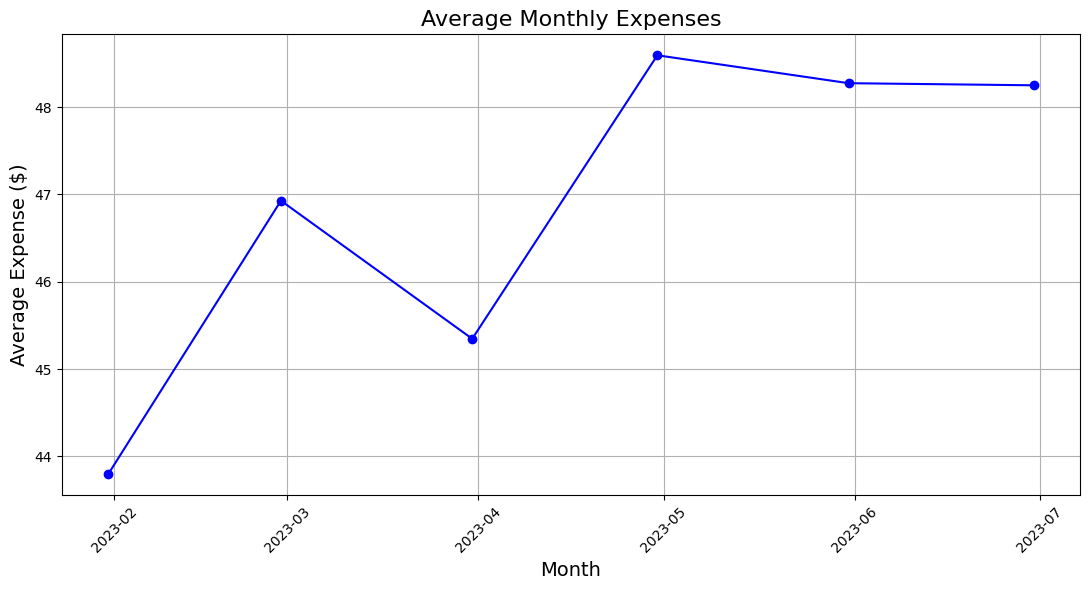

In [18]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Resample to monthly and calculate the mean expense for each month
expenses_m = df['amount'].resample('ME').mean()

# Plotting the data
plt.figure(figsize=[11, 6], dpi=100)
plt.plot(expenses_m.index, expenses_m, marker='o', linestyle='-', color='b')

# Adding grid, title, and labels
plt.grid(True)
plt.title('Average Monthly Expenses', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Expense ($)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

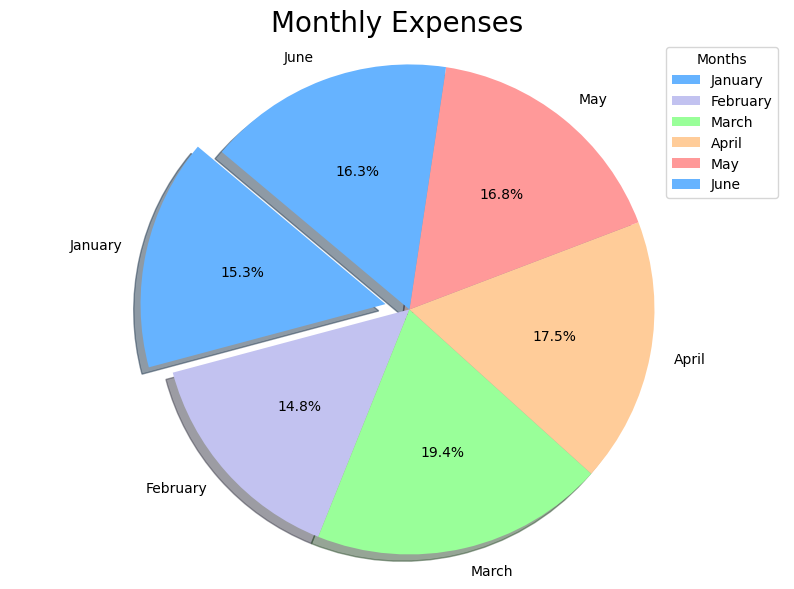

In [12]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Resample the data to get monthly expenses
expenses_m = df.resample('ME').sum()

# Extract the required data for plotting
x = expenses_m.index
y = expenses_m['amount']

# Generate dynamic labels for each month in the data
labels = [date.strftime('%B') for date in x]

# Dynamically create explode and colors arrays based on the length of the data
explode = [0.1] + [0] * (len(y) - 1)
colors = ['#66b3ff','#c2c2f0','#99ff99','#ffcc99','#ff9999'] * (len(y) // 5 + 1)

# Plot the pie chart
plt.figure(figsize=[10, 7], dpi=100)
plt.title('Monthly Expenses', fontsize=20)
plt.pie(y, labels=labels, autopct='%1.1f%%', explode=explode, colors=colors[:len(y)], startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(labels, title="Months", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()